# Author: Pradip Kumar Murmu

## Task 3: Exploratory Data Analysis- Retail

### In this particular, we analyze the USA, Sample Superstore dataset. Try to find out the weak areas where you can work to make more profit.
### What all business problems can derive by explorating the data.

# Import required libraries and dependency

In [98]:
#import important libraries

import pandas as pd # Data Processing, 
import numpy as np # Linear Algebra

import matplotlib.pyplot as plt # to plot the graph
import seaborn as sns


# Reading the data

In [99]:
#load the data
data = pd.read_csv('SampleSuperstore.csv')
# Display the few records from the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

In [10]:
data.shape

(9994, 13)

> SampleSuperstore data consists of 
* 9994 rows 
* 13 columns

In [109]:
# Name of columns/ labels in the dataset
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [100]:
#Details information about columns, name of columns, non-null count, DataType
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Dataset comprises of 13 columns, in which 
* 8 are categorical datatype
* 3 are float64 datatype
* 2 are int64 datatype


### Only United States country, sample superstore data we analyze in this particular data analysis task

In [6]:
print(data['Country'].unique())

['United States']


### Number of States in US purchased from superstore.

In [7]:
print('Number of States: {}'.format(data.State.nunique()))

Number of States: 49


### State with corresponding city

In [102]:
print(data.groupby('State')['City'].unique())


State
Alabama                 [Decatur, Montgomery, Florence, Mobile, Auburn...
Arizona                 [Gilbert, Phoenix, Scottsdale, Tucson, Mesa, S...
Arkansas                [Fayetteville, Jonesboro, Little Rock, Hot Spr...
California              [Los Angeles, San Francisco, Roseville, Pasade...
Colorado                [Aurora, Denver, Colorado Springs, Arvada, Lou...
Connecticut             [Fairfield, Manchester, Norwich, Middletown, M...
Delaware                                      [Dover, Wilmington, Newark]
District of Columbia                                         [Washington]
Florida                 [Fort Lauderdale, Melbourne, Tampa, Tamarac, S...
Georgia                 [Columbus, Atlanta, Warner Robins, Roswell, Ma...
Idaho                   [Meridian, Boise, Lewiston, Pocatello, Caldwel...
Illinois                [Naperville, Chicago, Orland Park, Bloomington...
Indiana                 [New Albany, Columbus, Richmond, La Porte, Ind...
Iowa                    [Urbanda

### Number of city in each state in US country were purchased from superstore

In [103]:
print(data.groupby('State')['City'].nunique())

State
Alabama                  8
Arizona                 13
Arkansas                 9
California              81
Colorado                16
Connecticut             10
Delaware                 3
District of Columbia     1
Florida                 36
Georgia                 11
Idaho                    6
Illinois                33
Indiana                 15
Iowa                     8
Kansas                   5
Kentucky                 8
Louisiana                5
Maine                    2
Maryland                 7
Massachusetts           14
Michigan                21
Minnesota               13
Mississippi              4
Missouri                 9
Montana                  5
Nebraska                 4
Nevada                   5
New Hampshire            3
New Jersey              18
New Mexico               7
New York                18
North Carolina          19
North Dakota             1
Ohio                    24
Oklahoma                 7
Oregon                   9
Pennsylvania          

# Ship Mode Feature analyze

### Number of People preferred ship mode

In [34]:
print(data.groupby('Ship Mode')['Ship Mode'].count())

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64


People Preferred ship mode


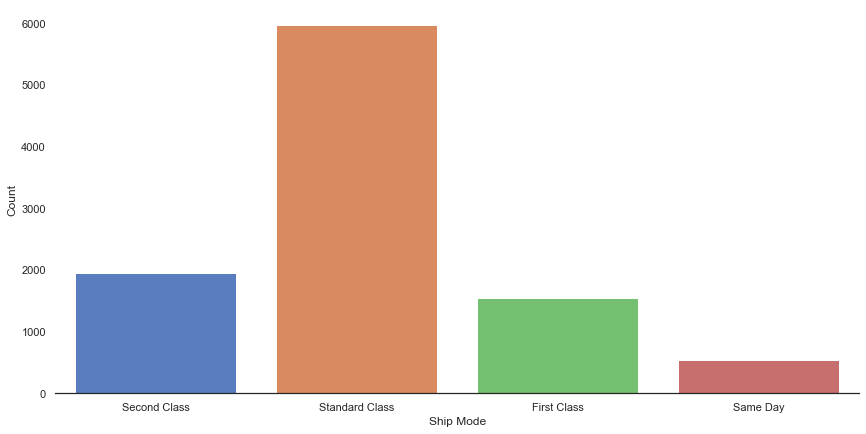

In [116]:
print('People Preferred ship mode')
g = sns.catplot(x ='Ship Mode',
               data=data,
               kind ='count',
               height = 6,
               aspect =2,
               )
g.set_axis_labels("Ship Mode", "Count")
g.set_titles("People preferred ship mode")
g.despine(left=True)

From the above categorical plot, we can find out that standard class ship mode is preferred more than the other ship modes are available. We can see, it is dominant other ship mode.

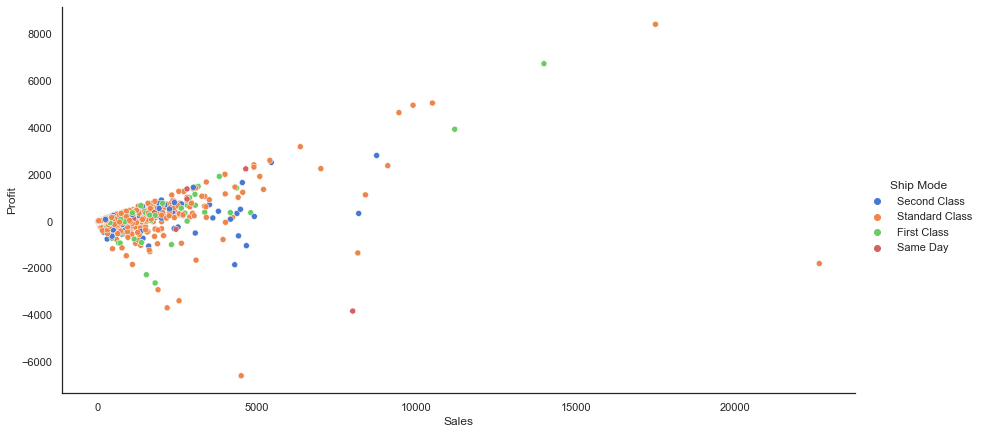

In [119]:
sns.relplot(x='Sales',
           y = 'Profit',
           hue='Ship Mode',
        
           data = data,
            height = 6,
            aspect = 2
        )

# Segment feature analysis

Customer Segments


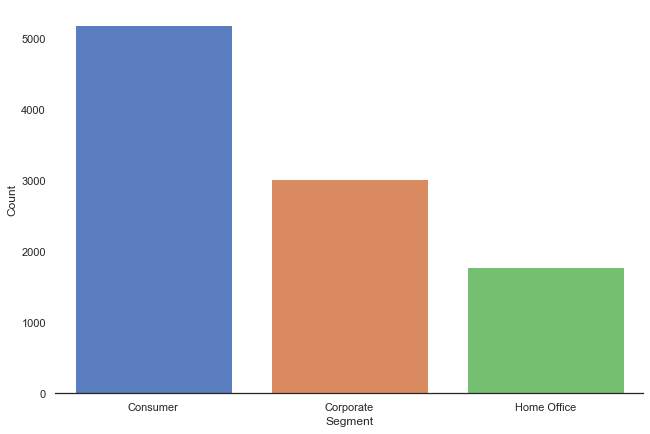

In [105]:
print('Customer Segments')
g = sns.catplot(x ='Segment',
               data=data,
               kind ='count',
               height = 6,
               aspect =1.5,
               )
g.set_axis_labels("Segment", "Count")
g.set_titles("People preferred ship mode")
g.despine(left=True)

In this segment is a categorical feature, Which includes three types of values.
1. Consumer (value counts ~ more than 5000)
2. Corporate segment (apprx. 3000)
3. Home office (nearly 2000)

# Category and Sub-Category feature analysis

In [107]:
pd.concat([data.groupby('Category')['Sub-Category'].nunique(), data.groupby('Category')['Sub-Category'].unique()], 
          axis = 1)


,Sub-Category,Sub-Category
Category,,
Furniture,4,"[Bookcases, Chairs, Tables, Furnishings]"
Office Supplies,9,"[Labels, Storage, Art, Binders, Appliances, Pa..."
Technology,4,"[Phones, Accessories, Machines, Copiers]"


Here we can see, there are three types of category superstore are selling 
1. Furniture which consists of 4 subcategories items Bookcases, Chairs, Tables, Furnishings
2. Office Supplies category consist 9 sub-categories Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies
3. Technology involves 4 subcategories, those are Phones, Accessories, Machines, Copiers

# Profit, Discount and Sales analysis

In [85]:
print(data[['Sales','Profit']].sum())

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64


From the above data we can see, Sales approx. 23 lakhs and earned profit of 2.86 lakhs.

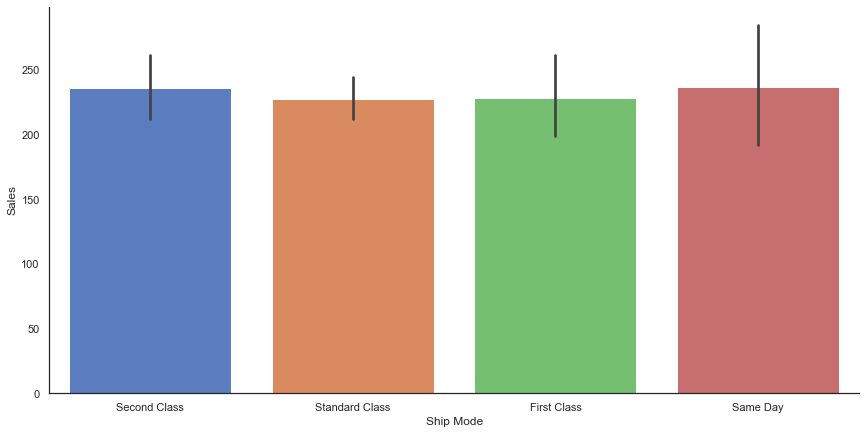

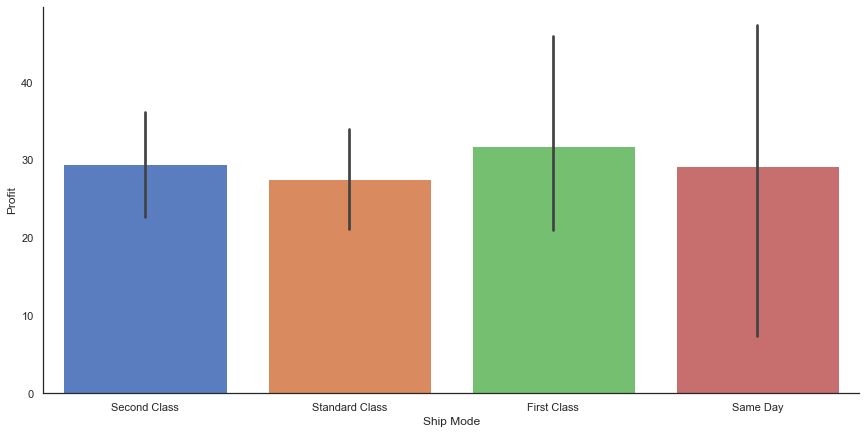

In [110]:
sns.set(style="white", palette="muted", color_codes=True)


sns.catplot(x ='Ship Mode', 
            y = 'Sales',
           data= data,
           kind = 'bar',
            height = 6,
            aspect=2
           )
sns.catplot(x ='Ship Mode', 
            y = 'Profit',
           data= data,
           kind = 'bar',
            height= 6,
            aspect =2
           )


### In one dataframe, we can see total Sales, Discount, Profit in the different categories.

In [89]:
group_by_category = data[['Category','Sales','Discount','Profit']].groupby('Category').sum()
group_by_category[[ 'Sales', 'Discount', 'Profit']]

,Sales,Discount,Profit
Category,,,
Furniture,741999.7953,368.89,18451.2728
Office Supplies,719047.0320,947.80,122490.8008
Technology,836154.0330,244.40,145454.9481


### Profit and Discount trade off in the different category products.

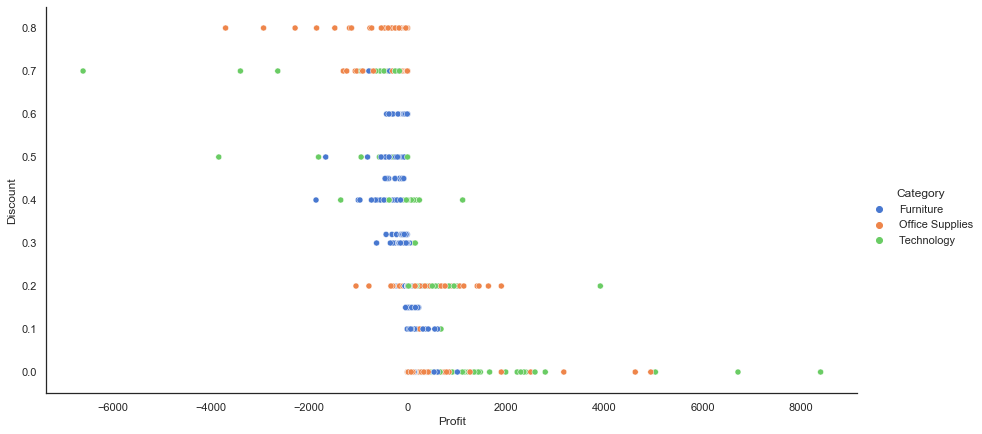

In [73]:
sns.relplot(x ='Profit',
           y = 'Discount',
           hue = 'Category',
           data = data,
           height = 6,
           aspect= 2)

From the above we can observe that
* Comparatively heavy discounts gave in Office supplies and the major losses are faced in this category.
* Technology with no discount earned much profit.
* As discount is increased 0.4 or more losses are faced in all categories product.
* Furniture are not making any profit, mostly they neutral or in loss

### Behaviour of Sales and discount of Product effect in the different category product.

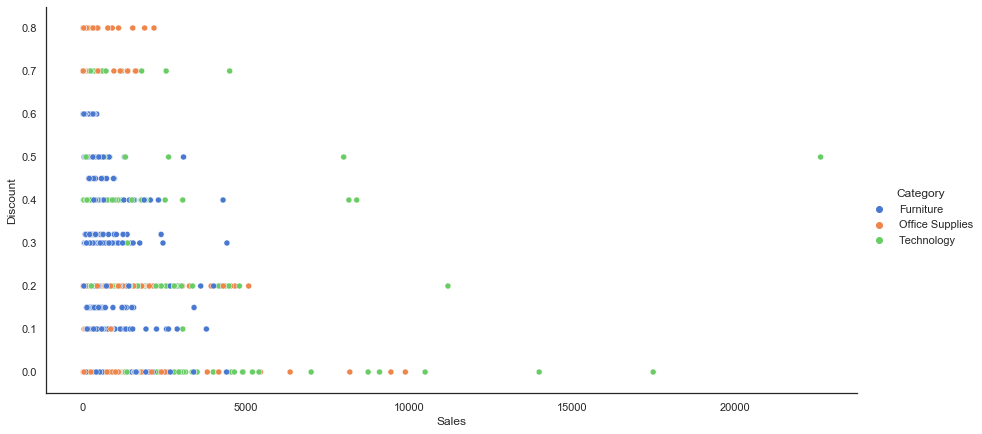

In [78]:
sns.relplot(x = 'Sales',
          y='Discount',
          hue = 'Category',
          data = data,
           height = 6,
           aspect = 2)

* On maximum discount 0.7 and 0.8, Sales of Office supplies was increased.
* Sales of Technology category was not effected by the discount of product.
* Due to discount, Sales of Furniture category was increased.

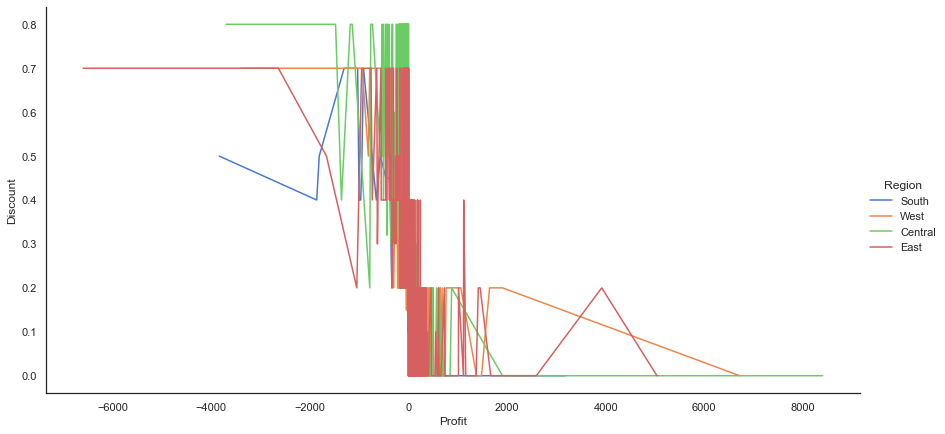

In [84]:
sns.relplot(y = 'Discount',
          x='Profit',
          hue = 'Region',
          data = data,
            kind='line',
           height = 6,
           aspect = 2)

From the above graph, we observed that 
* Discount greater than 0.2, losses were faced in Central region and less than 0.2 we are in profit in the same region.
* Due to discount, the superstore has not gained any profit in South, Only losses are faced.
* At a low discount, the superstore is in profit in east region and as the discount was increased, losses were also increased.

### Sales, Quantity of Product sales, Discount, Profit of each categories, and sub-categories product.

In [97]:
g = data[['Category','Sub-Category','Sales','Quantity','Discount', 'Profit']].groupby(['Category','Sub-Category']).sum()
g

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560
                Chairs        328449.1030      2356    105.00  26590.1663
                Furnishings    91705.1640      3563    132.40  13059.1436
                Tables        206965.5320      1241     83.35 -17725.4811
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054
                Art            27118.7920      3000     59.60   6527.7870
                Binders       203412.7330      5974    567.00  30221.7633
                Envelopes      16476.4020       906     20.40   6964.1767
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12486.3120      1400     25.00   5546.2540
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       223843.6080      3158     63.20  21278.8264
                Supplies       46673.5380       647     14.60  -1189.0995
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      189238.6310       440     35.20   3384.7569
                Phones        330007.0540      3289    137.40  44515.7306

* Maximum profit earned in Technology category. Especially Copiers, Phones, Accessories.
* Furniture category faced huge losses in the Tables, Bookcases sub-categories.
* Supplies category, Supplies faced losses. 

### Things that can be done to improve the sales
* Heavy discounts should not be offered in any categories.
* Discount range should be between 0.0 to 0.3 
* Furniture Category is the most poor performing category no discount should be offered in this category
* Furniture Category can be taken into consideration for closing as it is not making much progit even at lower discounts
* Central Region should not offer any kind of discounts fro better performance
* Office Supplies performs better when 0.2 discount is given so this much discount should be given in every region for the particular category.

# Thank You